#Insurance Claims Charges Prediction

Download dataset

In [46]:
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv

--2024-07-19 15:04:38--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55628 (54K) [text/plain]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  54.32K  --.-KB/s    in 0.001s  

2024-07-19 15:04:38 (59.4 MB/s) - ‘insurance.csv.1’ saved [55628/55628]



In [47]:
import pandas as pd

data=pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [48]:
import numpy as np
np.mean(data[data["sex"]=='female']["charges"])

12569.578843835347

##STEP-1: Importing Libraries & Data Set

In [49]:
#import basic libraries
import matplotlib.pyplot as plt

In [50]:
#Read the Data
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##STEP-2:Exploratory Data Analysis (EDA)

In [51]:
# Descriptive stats
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [52]:
# Null check
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Visulizations

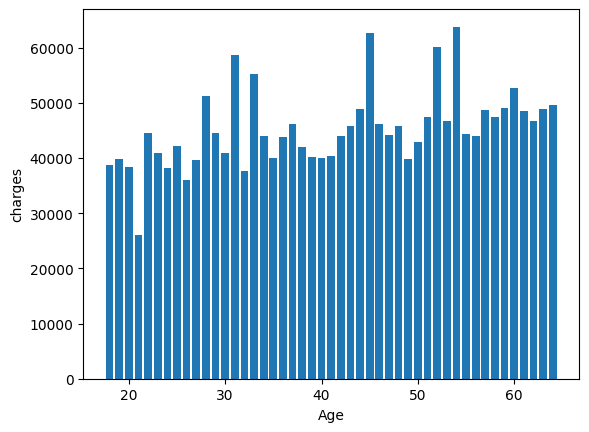

In [14]:
# Age vs Charges
x=data["age"]
y=data["charges"]
plt.bar(x,y)
plt.xlabel("Age")
plt.ylabel("charges")
plt.show()

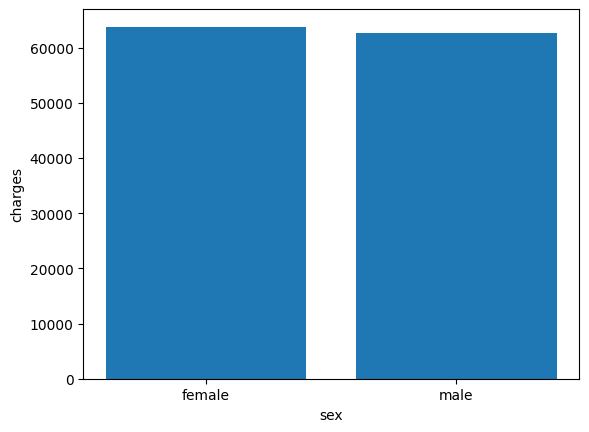

In [16]:
# sex vs charges
x=data["sex"]
y=data["charges"]
plt.bar(x,y)
plt.xlabel("sex")
plt.ylabel("charges")
plt.show()

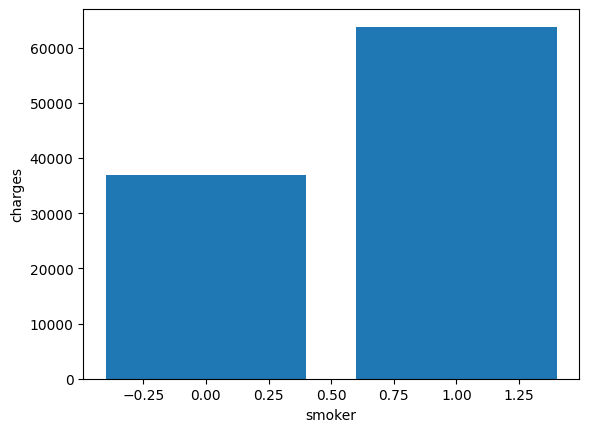

In [44]:
# smoker vs charges
x=data["smoker"]
y=data["charges"]
plt.bar(x,y)
plt.xlabel("smoker")
plt.ylabel("charges")
plt.show()

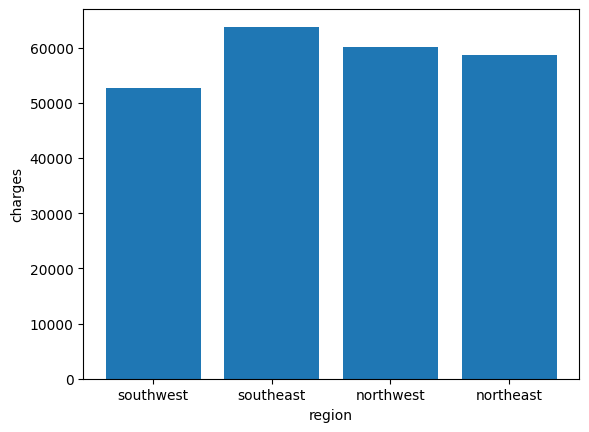

In [53]:
# region vs charges
x=data["region"]
y=data["charges"]
plt.bar(x,y)
plt.xlabel("region")
plt.ylabel("charges")
plt.show()

##STEP-3:Data Preprocessing / Clean the Data


In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [59]:
# removing unnecassary columns from the dataset
data= data.drop('region', axis=1)


In [56]:
# Label Encoding for sex and smoker
data['sex']=le.fit_transform(data['sex'])
data['smoker']=le.fit_transform(data['smoker'])
data

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [60]:

X = data.iloc[:,:5]
y = data.iloc[:,5]
print(X)
print(y)

      age  sex     bmi  children  smoker
0      19    0  27.900         0       1
1      18    1  33.770         1       0
2      28    1  33.000         3       0
3      33    1  22.705         0       0
4      32    1  28.880         0       0
...   ...  ...     ...       ...     ...
1333   50    1  30.970         3       0
1334   18    0  31.920         0       0
1335   18    0  36.850         0       0
1336   21    0  25.800         0       0
1337   61    0  29.070         0       1

[1338 rows x 5 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the dataset into the Training set and Test set

In [62]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [63]:
X_train

,age,sex,bmi,children,smoker
216,53,0,26.600,0,0
731,53,1,21.400,1,0
866,18,1,37.290,0,0
202,60,0,24.035,0,0
820,45,1,33.700,1,0
...,...,...,...,...,...
715,60,1,28.900,0,0
905,26,0,29.355,2,0
1096,51,0,34.960,2,1
235,40,0,22.220,2,1


In [64]:
X_test

,age,sex,bmi,children,smoker
559,19,1,35.530,0,0
1087,57,1,31.540,0,0
1020,51,1,37.000,0,0
460,49,0,36.630,3,0
802,21,1,22.300,1,0
...,...,...,...,...,...
682,39,1,35.300,2,1
629,44,0,38.950,0,1
893,47,1,38.940,2,1
807,19,0,36.575,0,0


In [65]:
y_train

216     10355.64100
731     10065.41300
866      1141.44510
202     13012.20865
820      7445.91800
           ...     
715     12146.97100
905      4564.19145
1096    44641.19740
235     19444.26580
1061    11554.22360
Name: charges, Length: 1070, dtype: float64

In [66]:
y_test

559      1646.42970
1087    11353.22760
1020     8798.59300
460     10381.47870
802      2103.08000
           ...     
682     40103.89000
629     42983.45850
893     44202.65360
807      2136.88225
1165     5227.98875
Name: charges, Length: 268, dtype: float64

##STEP-4 : Fit the Model & Predict , check the Accuracy

##Linear Regression

In [101]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [102]:
y_pred = lr.predict(X_test)
y_pred_train = lr.predict(X_train)
y_pred

array([ 4100.43282559, 12693.04261163, 12808.93825952, 13634.43104889,
         989.14106269, 31836.69901918, 13260.4556974 , 11773.1368127 ,
        3269.04728479, 29967.12306097, 11566.2943743 , 17589.21131852,
        9102.82060306,  8688.8759399 ,  3506.91786571, 10773.56765472,
        3804.09391255,  7297.86635221, 15369.94892684, 14725.96903573,
       11923.73189064, 33235.48924194,  8931.10636446,  9379.93704037,
        2427.44626748,  8013.19788493,  9023.14928342, 11151.71675937,
        7960.88342028,  3869.66401139, 14376.0228159 ,  6184.02836295,
       34160.18316202, 26767.56074434, 33857.35566434,  9459.19016445,
       30637.57582122, 27011.99400001, 15477.04190131, 33686.87698538,
        6700.69819635, 13820.11681384, 11209.52515213, 15310.65265643,
        4609.12743162, 12569.54322362,  4697.63805101, 29017.60068768,
        7267.38694039, 13713.78648559, 13734.72880029, 12664.19925768,
        1770.5265761 ,  9269.43300796, 25525.26931937, 10341.82186649,
      

In [103]:
y_pred_train

array([10390.47468234,  8975.054837  ,  4378.90611318, ...,
       37003.17084878, 30279.37605289, 12001.58140715])

In [104]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
mse

35699244.58251515

In [110]:
rmse = np.sqrt(mse)
rmse

5974.884482775809

In [105]:
r2 = r2_score(y_test,y_pred)
r2

0.760858175073853

standard scaler


In [106]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [107]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [112]:
mse = mean_squared_error(y_test,y_pred)
mse

165631949.2912242

In [113]:
rmse = np.sqrt(mse)
rmse

12869.80766333453

In [115]:
r2 = r2_score(y_test,y_pred)
r2

-0.10953402747850949

##Decision Tree

In [119]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [120]:
mse = mean_squared_error(y_test,y_pred)
mse

35327563.59059835

In [121]:

rmse = np.sqrt(mse)
rmse

5943.699486901937

In [122]:
r2 = r2_score(y_test,y_pred)
r2

0.7633479888426541

##Random Forest

In [123]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [124]:
mse = mean_squared_error(y_test, y_pred)
mse

22787929.311332677

In [125]:
rmse = np.sqrt(mse)
rmse

4773.670423409295

In [126]:
r2 = r2_score(y_pred,y_test)
r2

0.8352926619074149